#**CAR PRICE PREDICTION**

The project focuses on the development of a used car price prediction model. The aim of the project is to use data on various characteristics of cars, such as mileage, engine type, color, etc., to create a predictive model. Thanks to this model, it may be possible to get an estimate of the value of cars or forecast prices in the market.


In [ ]:
import pandas as pd

#loading the data
df1 = pd.read_csv('datasets/cars.csv')
df2 = pd.read_csv('datasets/autoscout24-germany-dataset.csv')

Called head() on both dataframes to see what they look like:

In [ ]:
df1.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


In [ ]:
df2.head(3)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011


Remove irrelevant columns from both datasets. This is important to improve analysis and predictive models, which are often less effective when dealing with large amounts of redundant data.

In [ ]:
df1 = df1.drop(columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8','feature_9', 'feature_1', 'has_warranty', 'state', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'duration_listed', 'engine_type'])

In [ ]:
df2 = df2.drop(columns='offerType')

Changed the column names in the first dataset to be more descriptive. This is helpful for understanding what each column represents.

In [ ]:
df1 = df1.rename(columns ={
    'odometer_value':'mileage',
    'manufacturer_name': 'make',
    'model_name': 'model',
    'engine_fuel':'fuel',
    'transmission': 'gear',
    'price_usd': 'price',
    'year_produced': 'year'
})

Data types in "mileage" and "price" columns have been converted to float type.

In [ ]:
print('Dataframe 1 datatypes:')
print(df1.dtypes)
print('\nDataframe 2 datatypes:')
print(df2.dtypes)


Dataframe 1 datatypes:
make                object
model               object
gear                object
color               object
mileage              int64
year                 int64
fuel                object
engine_has_gas        bool
engine_capacity    float64
body_type           object
drivetrain          object
price              float64
dtype: object

Dataframe 2 datatypes:
mileage      int64
make        object
model       object
fuel        object
gear        object
price        int64
hp         float64
year         int64
dtype: object


In [ ]:
#changing data types
df1['mileage'] = df1['mileage'].astype(float)
df1['price'] = df1['price'].astype(float)

df2['mileage'] = df2['mileage'].astype(float)
df2['price'] = df2['price'].astype(float)


Combined both datasets into one dataframe, ignoring the indexes from the original dataframes. Now all data is in one place for easy analysis.

In [ ]:
df1.columns

Index(['make', 'model', 'gear', 'color', 'mileage', 'year', 'fuel',
       'engine_has_gas', 'engine_capacity', 'body_type', 'drivetrain',
       'price'],
      dtype='object')

In [ ]:
df2.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'price', 'hp', 'year'], dtype='object')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

df.head()

,make,model,gear,color,mileage,year,fuel,engine_has_gas,engine_capacity,body_type,drivetrain,price,hp
0,Subaru,Outback,automatic,silver,190000.0,2010,gasoline,False,2.5,universal,all,10900.00,NaN
1,Subaru,Outback,automatic,blue,290000.0,2002,gasoline,False,3.0,universal,all,5000.00,NaN
2,Subaru,Forester,automatic,red,402000.0,2001,gasoline,False,2.5,suv,all,2800.00,NaN
3,Subaru,Impreza,mechanical,blue,10000.0,1999,gasoline,False,3.0,sedan,all,9999.00,NaN
4,Subaru,Legacy,automatic,black,280000.0,2001,gasoline,False,2.5,universal,all,2134.11,NaN


In [ ]:
df.isna().sum()

make                   0
model                143
gear                 182
color              46405
mileage                0
year                   0
fuel                   0
engine_has_gas     46405
engine_capacity    46415
body_type          46405
drivetrain         46405
price                  0
hp                 38560
dtype: int64

---
Filling missing values in selected columns with median or mode, depending on 
data type. This is a crucial step in preparing the data for analysis, as missing data can affect the results of the analysis. It was decided not to remove the missing data because it could significantly affect the prediction of the model when there is a lot of missing data.

In [ ]:
for column in ['year', 'mileage', 'engine_capacity', 'hp']:
    df[column] = df[column].fillna(df[column].median())


In [ ]:
df.isna().sum()

make                   0
model                143
gear                 182
color              46405
mileage                0
year                   0
fuel                   0
engine_has_gas     46405
engine_capacity        0
body_type          46405
drivetrain         46405
price                  0
hp                     0
dtype: int64

In [ ]:
#data cleaning: filling missing values with mod (most common value
for column in ['model', 'gear', 'color', 'engine_has_gas', 'body_type', 'drivetrain']:
    df[column] = df[column].fillna(df[column].mode()[0])

For categorical variables, one approach is to use the most common category (mode) for missing values. More advanced techniques can also be used, such as k-NN imputation or imputation based on predictive models such as decision trees or random forests.

K-NN imputation works by finding the nearest neighbors for observations with missing data, and then using their values to fill in the missing data. Therefore, this technique can be computationally expensive for large data sets, so it was decided to supplement the missing data with mode.



---


The age of the car as a new column has been added, calculated as the difference between the current year and the year of manufacture. Then the "year" column was removed.

In [ ]:
df['car_age'] = 2023 - df['year']

df.drop(labels='year', axis=1, inplace=True)

In [ ]:
df.isna().sum()

make               0
model              0
gear               0
color              0
mileage            0
fuel               0
engine_has_gas     0
engine_capacity    0
body_type          0
drivetrain         0
price              0
hp                 0
car_age            0
dtype: int64

In [ ]:
num_rows = df.shape[0]
print(f"Rows number: {num_rows}")

Rows number: 84936


#**DATA VISUALIZATION**

The values in the rows in 'fuel' columns have different names even though they may mean the same thing. These values have been renamed.

In [ ]:
df['fuel'] = df['fuel'].replace({
    'Gasoline':'gasoline',
    'Diesel': 'diesel',
    'Electric/Gasoline':'hybrid-petrol',
    'Electric/Diesel':'hybrid-diesel',
    'LPG': 'gas',
    'Electric':'electric'
    })

The seaborn library was used to create bar graphs that show the relationship between various variables and the price of a car.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

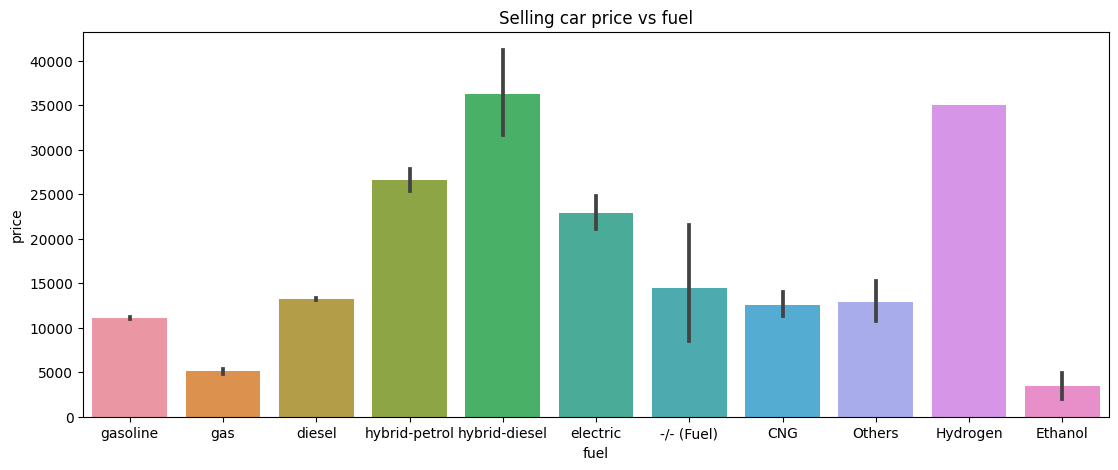

In [ ]:
plt.figure(figsize=[45,5])
plt.subplot(1,3,1)
sns.barplot(data=df, x='fuel', y='price')
plt.title('Selling car price vs fuel')

plt.show()

Fuel affects the price of the car. The chart above shows that hybrid-diesel and hydrogen cars are more expensive. Cars running on gas or ethanol depreciate in value and are relatively the cheapest.



---


In the same case as for the 'fuel' column, the 'gear' column also has different value names that mean the same thing, so they have been updated

In [ ]:
df['gear'] = df['gear'].replace({
    'Automatic':'automatic',
    'Manual':'mechanical',
    'Semi-automatic':'semi-automatic'
})

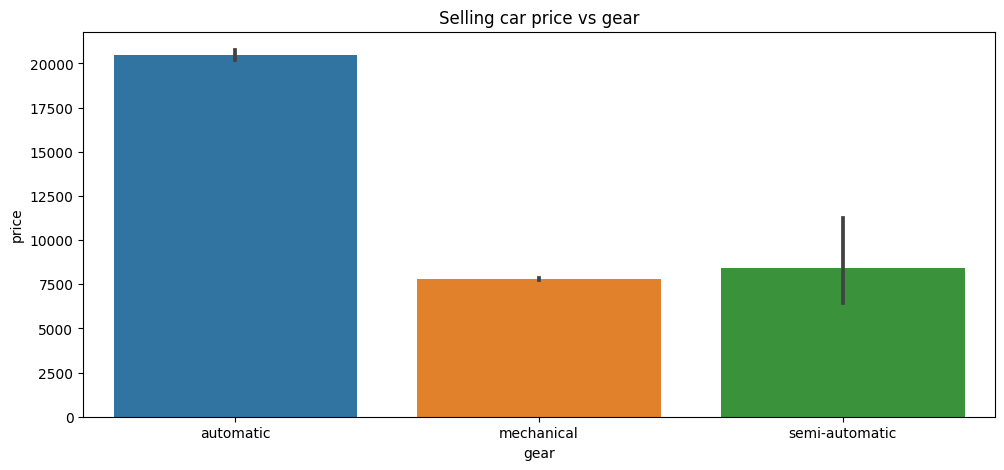

In [ ]:
plt.figure(figsize=[40,5])
plt.subplot(1,3,2)
sns.barplot(data=df, x='gear', y='price')
plt.title('Selling car price vs gear')

plt.show()

The graph shows that cars with an automatic gear are more expensive than those with a manual or semi-mechanical gear.

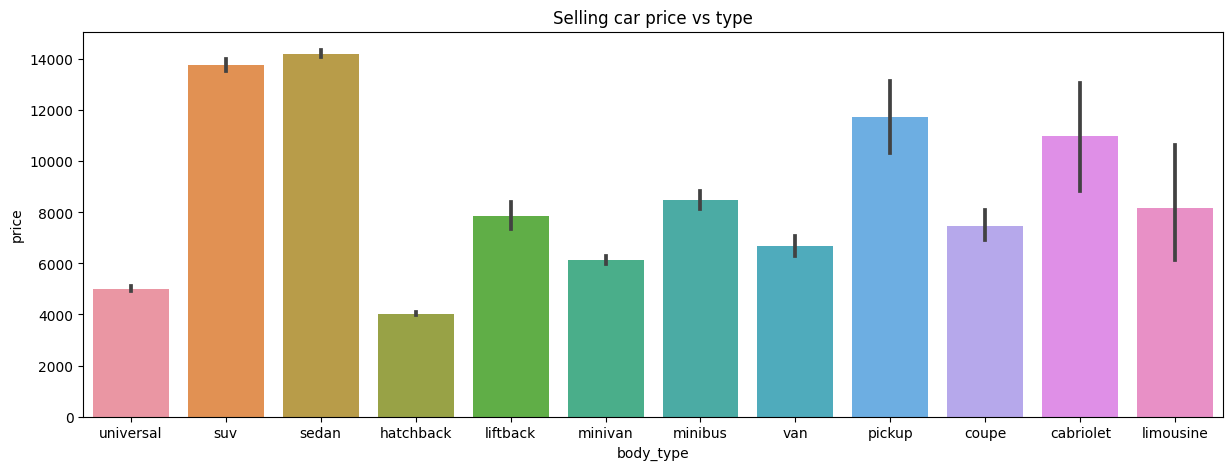

In [ ]:
#influence of car type on price
plt.figure(figsize=[50,5])
plt.subplot(1,3,2)
sns.barplot(data=df, x='body_type', y='price')
plt.title('Selling car price vs type')

plt.show()

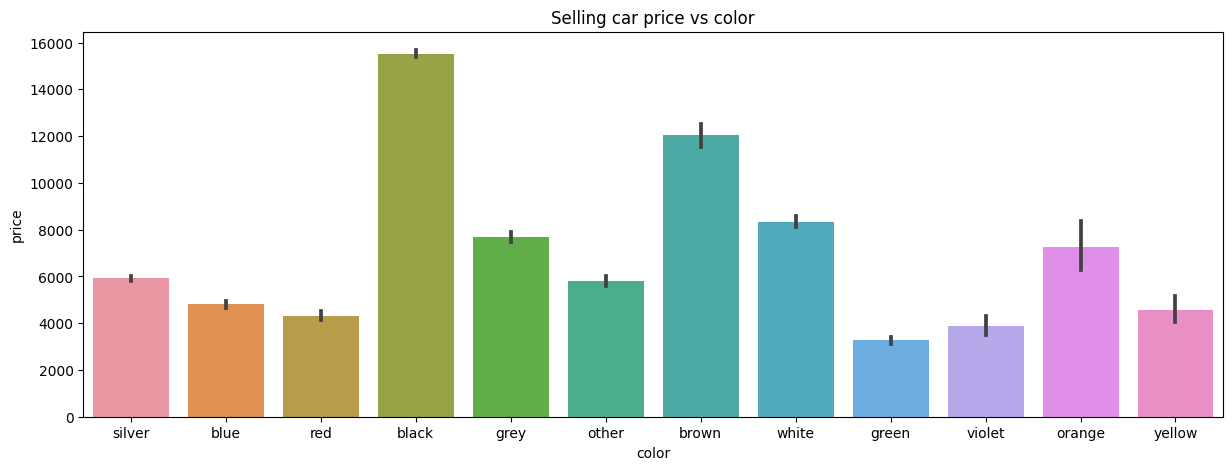

In [ ]:
#influence of car color on price
plt.figure(figsize=[50,5])
plt.subplot(1,3,2)
sns.barplot(data=df, x='color', y='price')
plt.title('Selling car price vs color')

plt.show()

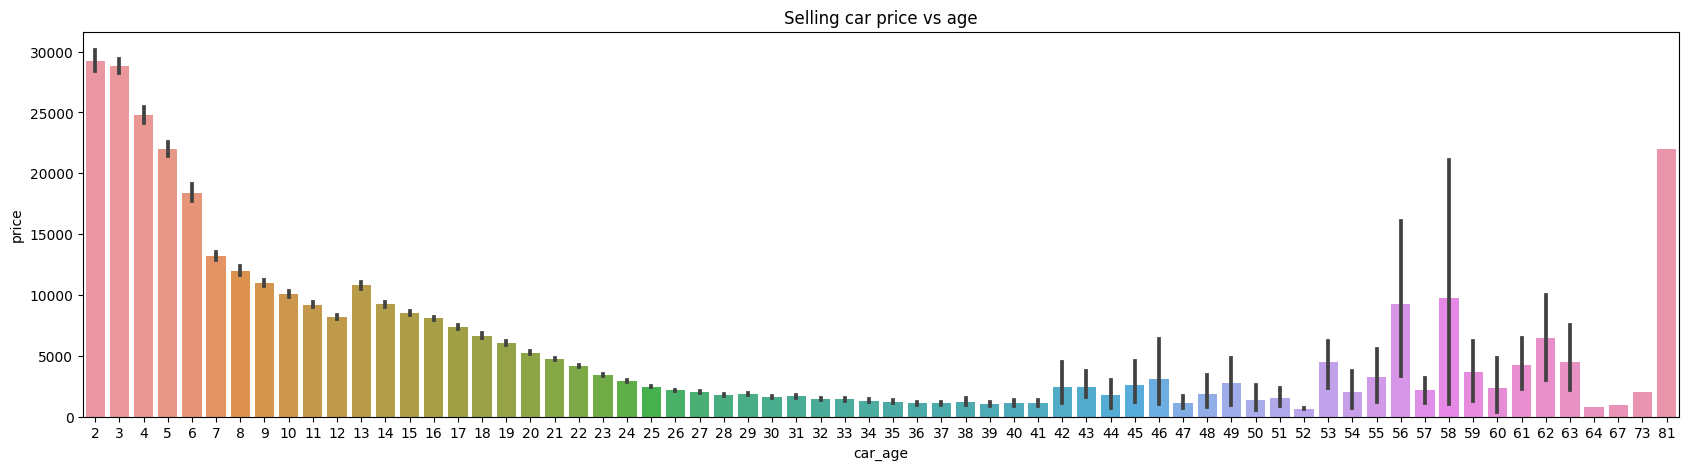

In [ ]:
plt.figure(figsize=[70,5])
plt.subplot(1,3,3)
sns.barplot(data=df, x='car_age', y='price')
plt.title('Selling car price vs age')

plt.show()

The graph shows the ratio of the car's price to its age. In the age range from 2 to about 41, you can see that the younger the car, the higher the price. In the age range of about 42 to 81, this cannot be clearly stated. Car prices fluctuate between different values.

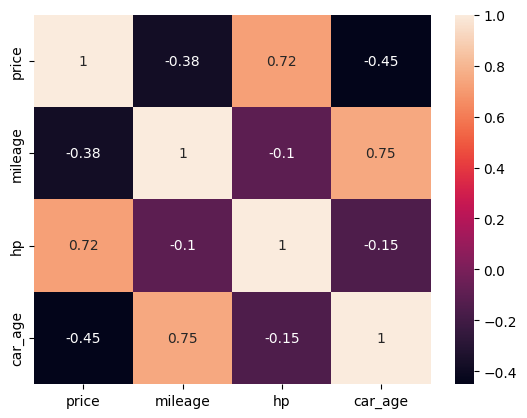

In [ ]:
corr = df[['price', 'mileage', 'hp', 'car_age']].corr()
sns.heatmap(corr, annot=True)
plt.show()


A correlation heatmap is a graphical representation of the correlations between different variables. Using the Correlation Heatmap, we can understand the relationship between different variables. Correlation values range from -1 to +1.
A value of +1 indicates a strong positive correlation (i.e. when one variable increases, the other increases as well).
A value of -1 indicates a strong negative correlation (that is, when one variable increases, the other decreases).
A value of 0 means no correlation.



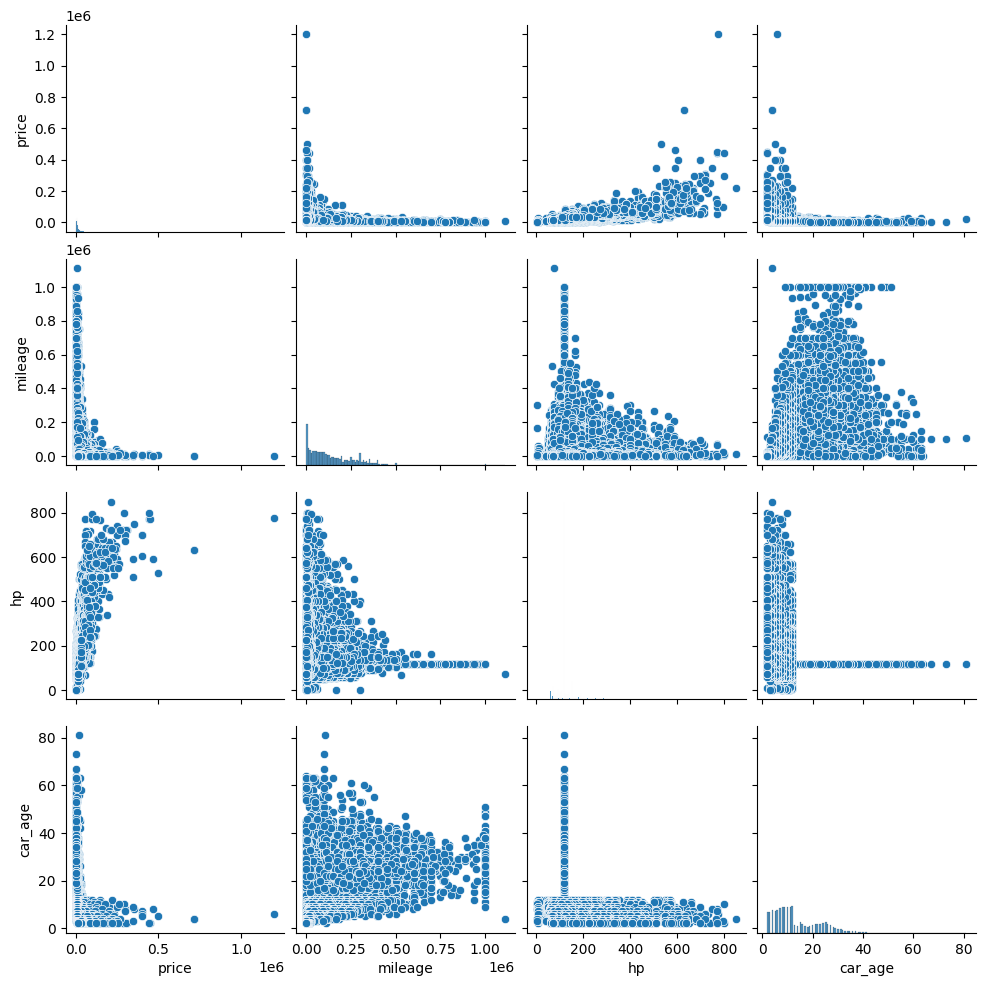

In [ ]:
sns.pairplot(df[['price', 'mileage', 'hp', 'car_age']])
plt.show()


In [ ]:
df.head()

,make,model,gear,color,mileage,fuel,engine_has_gas,engine_capacity,body_type,drivetrain,price,hp,car_age
0,Subaru,Outback,automatic,silver,190000.0,gasoline,False,2.5,universal,all,10900.00,116.0,13
1,Subaru,Outback,automatic,blue,290000.0,gasoline,False,3.0,universal,all,5000.00,116.0,21
2,Subaru,Forester,automatic,red,402000.0,gasoline,False,2.5,suv,all,2800.00,116.0,22
3,Subaru,Impreza,mechanical,blue,10000.0,gasoline,False,3.0,sedan,all,9999.00,116.0,24
4,Subaru,Legacy,automatic,black,280000.0,gasoline,False,2.5,universal,all,2134.11,116.0,22


Changed the values in categorical columns to a format that is easier to process by machine models using one-hot coding.

In [ ]:
print(df['make'].unique())
print(df['model'].unique())
print(df['gear'].unique())
print(df['color'].unique())
print(df['fuel'].unique())
print(df['engine_has_gas'].unique())
print(df['body_type'].unique())
print(df['drivetrain'].unique())

['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler' 'SEAT'
 'MINI' 'smart' 'Cupra' 'Lada' 'Others' 'Maserati' 'Bentley' 'Land' 'Alfa'
 'Microcar' 'Lamborghini' 'Baic' 'Tesla' '9ff' 'McLaren' 'Aston'
 'Rolls-Royce' 'Alpine' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari'
 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou' 'Morgan' 'Maybach' 'Tazzari'
 'Trucks-Lkw' 'RAM' 'DAF' 'Alpina' 'Polestar' 'Brilliance' 'FISKER'
 'Trailer-Anhänger' 'Isuzu' 'Corvette' 'DFSK' 'Estrima']
['Outback' 'Forester' 'Impreza' ... 'A110' 'iX3' 'NV250']
['automatic' 'mechanical' 'se

In [ ]:
df = df.drop(labels=['make', 'model'], axis=1)

In [ ]:
df.head()

,gear,color,mileage,fuel,engine_has_gas,engine_capacity,body_type,drivetrain,price,hp,car_age
0,automatic,silver,190000.0,gasoline,False,2.5,universal,all,10900.00,116.0,13
1,automatic,blue,290000.0,gasoline,False,3.0,universal,all,5000.00,116.0,21
2,automatic,red,402000.0,gasoline,False,2.5,suv,all,2800.00,116.0,22
3,mechanical,blue,10000.0,gasoline,False,3.0,sedan,all,9999.00,116.0,24
4,automatic,black,280000.0,gasoline,False,2.5,universal,all,2134.11,116.0,22


In [ ]:
categorical_columns = ['gear', 'color', 'fuel', 'engine_has_gas', 'body_type', 'drivetrain']
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = encoded_df.astype(int)


In [ ]:
df.head()

,mileage,engine_capacity,price,hp,car_age,gear_mechanical,gear_semi-automatic,color_blue,color_brown,color_green,...,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,drivetrain_front,drivetrain_rear
0,190000,2,10900,116,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,290000,3,5000,116,21,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,402000,2,2800,116,22,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10000,3,9999,116,24,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,280000,2,2134,116,22,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


A neural network model was created and trained to predict car prices based on other characteristics. The model was then evaluated using metrics such as mean squared error, mean absolute error, and coefficient of determination R2.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#adding a new feature
df['mileage_per_year'] = df['mileage'] / df['car_age']


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

#division into training data (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#creating a model 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
#model build
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#model training
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
2124/2124 [==============================] - 5s 2ms/step - loss: 139928496.0000
Epoch 2/100
2124/2124 [==============================] - 4s 2ms/step - loss: 66306976.0000
Epoch 3/100
2124/2124 [==============================] - 4s 2ms/step - loss: 59942532.0000
Epoch 4/100
2124/2124 [==============================] - 4s 2ms/step - loss: 60415012.0000
Epoch 5/100
2124/2124 [==============================] - 4s 2ms/step - loss: 58787888.0000
Epoch 6/100
2124/2124 [==============================] - 4s 2ms/step - loss: 59017680.0000
Epoch 7/100
2124/2124 [==============================] - 4s 2ms/step - loss: 58930476.0000
Epoch 8/100
2124/2124 [==============================] - 4s 2ms/step - loss: 55485880.0000
Epoch 9/100
2124/2124 [==============================] - 4s 2ms/step - loss: 55640128.0000
Epoch 10/100
2124/2124 [==============================] - 4s 2ms/step - loss: 54468228.0000
Epoch 11/100
2124/2124 [==============================] - 4s 2ms/step - loss: 56232872.0

In [ ]:
#prediction on the test set 
y_pred = model.predict(X_test_scaled)

531/531 [==============================] - 1s 1ms/step


In [ ]:
#calculation of model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 45434584.01903186
MAE: 2454.4578891481992
R^2: 0.8163597282723752


**1. High MSE:**

MSE (Mean Squared Error) is the result of the squared difference between predicted and actual values. The value 45434584.01903186 is quite high, suggesting that the model may be making large prediction errors. However, given the scale of car prices, this value may be acceptable.



---


**2. Mean Absolute Error (MAE):**

The MAE value is the average value of the prediction errors without taking into account their direction (that is, regardless of whether the model is overpricing or underpricing). The MAE value is 2454.4578891481992. This means that the typical prediction error of the model is around 2454 units. In the context of car prices, this could be a significant distortion.


---


**3. Coefficient of determination (R^2):**

The value of R^2 is 0.8163597282723752. This is a relatively high result and suggests that the model is able to explain about 81.6% of the variance in the data. Despite some large errors, overall the model is quite effective at predicting car prices.

In [ ]:
#converting predicted and actual values to DataFrame
results_df = pd.DataFrame({'Predicted': y_pred.flatten(), 'Actual': y_test.values})

#pint the table
print(results_df)

          Predicted  Actual
0       6467.958496    6800
1      12012.098633   15800
2       8535.642578    7300
3       5228.777344    6450
4      11105.184570   10791
...             ...     ...
16983   2007.094727    2200
16984   2007.094727    2600
16985  13542.038086   12400
16986   9513.590820   11900
16987  26909.818359   23990

[16988 rows x 2 columns]


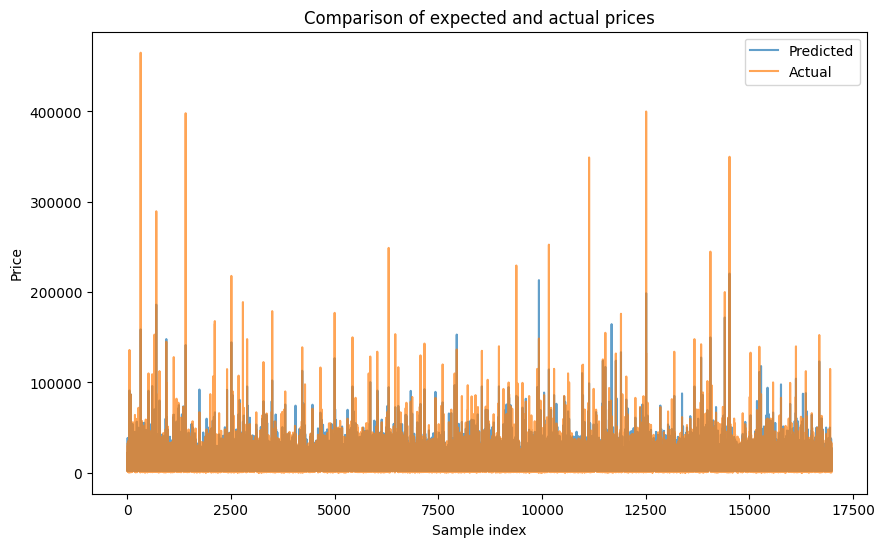

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', alpha=0.7)
plt.plot(results_df.index, results_df['Actual'], label='Actual', alpha=0.7)

plt.xlabel('Sample index')
plt.ylabel('Price')
plt.title('Comparison of expected and actual prices')

plt.legend()
plt.show()


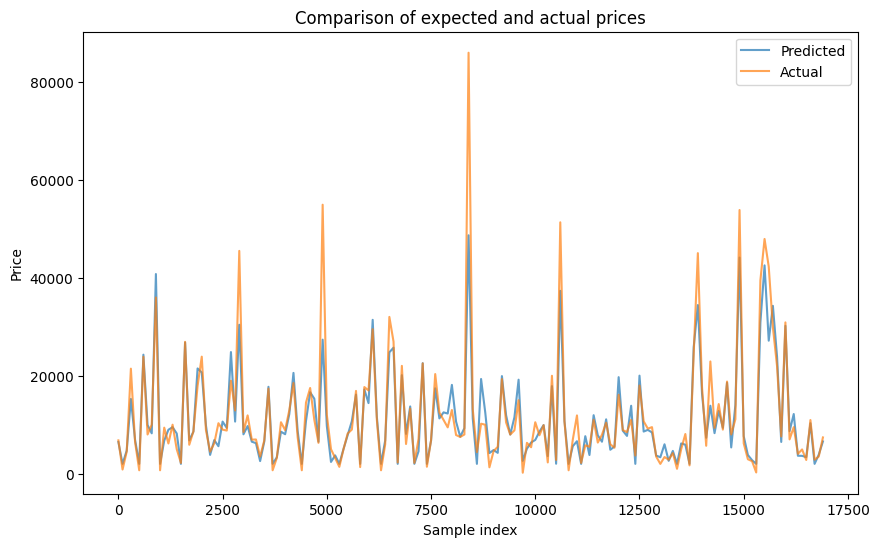

In [ ]:
#select every 100th sample 
subset_df = results_df.iloc[::100]

plt.figure(figsize=(10, 6))
plt.plot(subset_df.index, subset_df['Predicted'], label='Predicted', alpha=0.7)
plt.plot(subset_df.index, subset_df['Actual'], label='Actual', alpha=0.7)

plt.xlabel('Sample index')
plt.ylabel('Price')
plt.title('Comparison of expected and actual prices')

plt.legend()
plt.show()


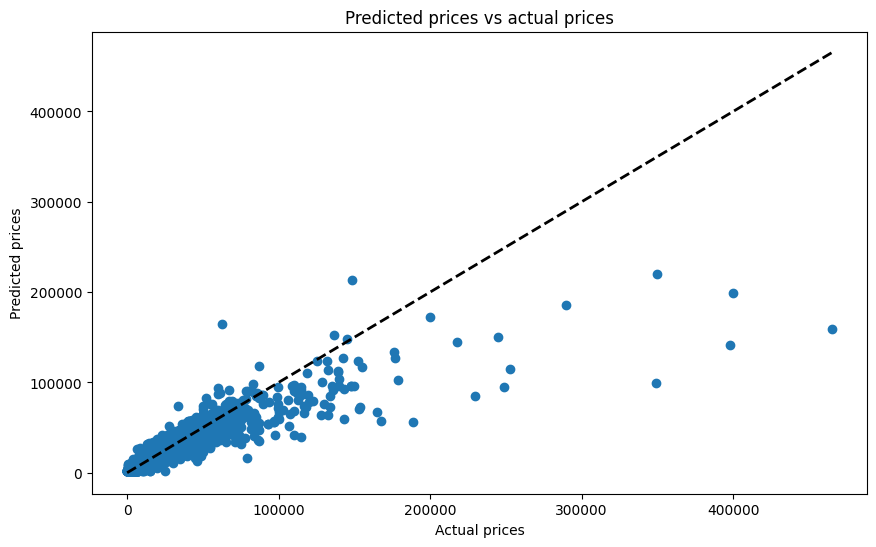

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'])
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)

plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Predicted prices vs actual prices')
plt.show()


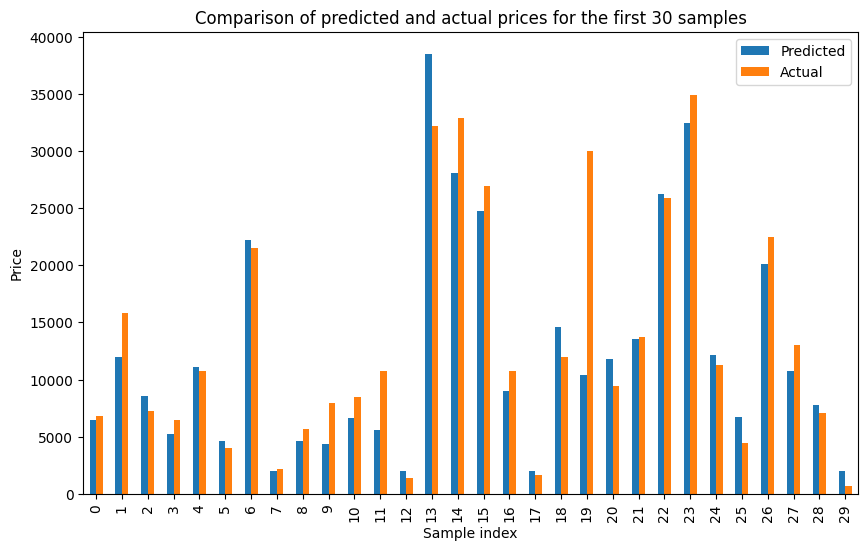

In [ ]:
#select n first samples
n = 30
subset_df = results_df.iloc[:n]

subset_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sample index')
plt.ylabel('Price')
plt.title('Comparison of predicted and actual prices for the first {} samples'.format(n))
plt.show()


#Conclusions from the Project

This car price prediction project focused on several key aspects: data quality, iterative model training process, and potential for improvement.


---


**1. Data quality and data preparation:**

It was understood that data quality is critical to the effectiveness of predictive models. In this case, a significant amount of missing data has been supplemented by fashion. While this is a common approach, it could have affected the performance of the model if fashion was not a good representation of all missing values. In this case, the model may have learned erroneous patterns, which affected its ability to accurately predict car prices. Proper data preparation is an integral part of the process of creating a predictive model, including data cleaning, filling in missing values, coding categorical variables and selecting the most significant features for prediction.


---



**2. Iterative model training process:**

Through trial and error, the model was fine-tuned to perform best. The best R^2 values that were achieved were between 80 and 82%. This highlights that the modeling process is a continuous process that requires constant refinement and adjustment of the model based on new insights and observations.


---


**3. Potential Improvements:**

It has been realized that there are various possibilities to improve the model. Other methods of filling in missing data may be considered, such as interpolation or using a model to predict missing values. You can also customize the model, for example by trying different algorithms, applying regularization, or adjusting hyperparameters. Alternatively, we can look for additional data that can improve the model.


---



#4. Summary:

Despite some data quality challenges, the model was successful in predicting car prices, accounting for approximately 81.6% of the variance in the data. The model training process is an iterative process that can lead to even better results over time.

In conclusion, working on this project made it possible to understand how crucial it is to focus on data quality and proper data preparation as the first step in the modeling process. It was also understood that the model training process is a constant adaptation and improvement.


It is important to always look for opportunities to improve and strive for continuous learning. Despite some challenges, the model was successful in explaining much of the variance in car prices.